In [8]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
from math import pi, sqrt


ibmqfactory.load_account:WARNING:2022-11-26 17:28:48,332: Credentials are already in use. The existing account in the session will be replaced.


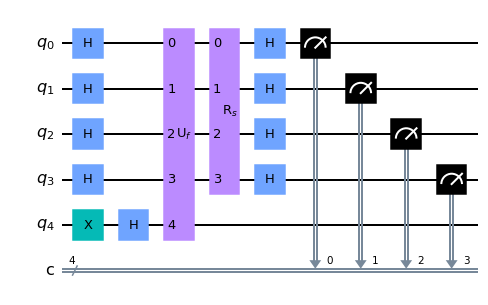

In [11]:
from qiskit.circuit.library import MCMT
def diffuser(nqubits):
    qc=QuantumCircuit(n)
    #diff = Hadamard^n R_0 Hadamard^n
    for qubits in range(nqubits):
        qc.h(qubit)
    #Apply X Gates FOR R_)
    for qubits in range(nqubits):
        qc.x(qubit)
    #apply MCMT
    cnz = MCMT('z',num_ctrl_qubits=nqubits-1,num_target_qubits=1)
    qc=qc.compose(cnz)
    
    for qubits in range(nqubits):
        qc.x(qubit)
        
    qc.x(0)
    qc.z(0)
    qc.x(0)
    qc.z(0)
    #END OF R_0
    
    #END circuit with hadamard cascade
    for qubits in range(nqubits):
        qc.h(qubit)
    #end of r_s
    
    
    R_s = qc.to_gate()
    R_s.name="R$_s$"
    return R_s
#input string size n=6
n=4

#create oracle

qc=QuantumCircuit(n+1)
#qc.cx(1,n) #here the 2nd index in string in 1
#qc.cx(0,n) #here the 1st index in string is 1
qc.cx(2,n) # here the 3rd index in string is 1 so Special String = 111000
oracle_exn = qc.to_gate()
oracle_exn.name = "U$_f$"

grover_circuit  = QuantumCircuit(n+1,n)
grover_circuit.x(n)
grover_circuit.h(n)
#converting all n qubits into the |+> state
for qubit in range(n):
    grover_circuit.h(qubit)

#Number of iterations of oracle required tosolve
t=pi*sqrt(pow(pow(2,n),0.5))/4-0.5
t=int(t)
          
#compiling the circuit
          
for i in range(t):
          grover_circuit=grover_circuit.compose(oracle_exn)
          grover_circuit=grover_circuit.compose(diffuser(n))

#adding hadamard gats in the end
for qubit in range(n):
          grover_circuit.h(qubit)
          
for i in range(n):
          grover_circuit.measure(i,i)
grover_circuit.draw()


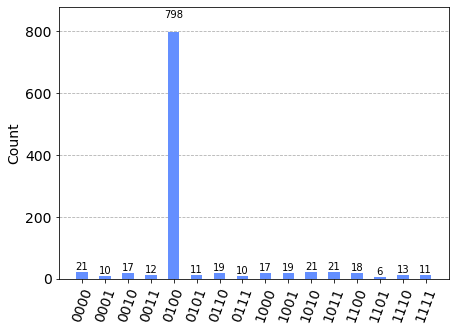

In [15]:
sim = Aer.get_backend("aer_simulator")
qobj = transpile(grover_circuit,sim)
transpiled_qobj = assemble(qobj)
rsults = sim.run(transpiled_qobj).result()
counts=rsults.get_counts()

plot_histogram(counts)
